# Fashion Products Dataset - Exploratory Data Analysis

## 1. Import Libraries and Load Data

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
import os

In [3]:
# Get the correct file path\n
script_dir = os.path.dirname(os.path.abspath('.'))
project_root = os.path.dirname(script_dir)
data_path = os.path.join(project_root, 'data', 'fashion_products_dataset.json')

# Load the dataset
with open(data_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

print(f"Dataset loaded successfully!")
print(f"Number of products: {len(df)}")
print(f"Number of features: {len(df.columns)}")

Dataset loaded successfully!
Number of products: 28080
Number of features: 17


## 2. Basic Dataset Overview

In [4]:
print("Dataset Overview:")
print("\nColumns:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)

print("\nFirst 5 rows:")
df.head()

Dataset Overview:

Columns: ['_id', 'actual_price', 'average_rating', 'brand', 'category', 'crawled_at', 'description', 'discount', 'images', 'out_of_stock', 'pid', 'product_details', 'seller', 'selling_price', 'sub_category', 'title', 'url']

Data types:
_id                object
actual_price       object
average_rating     object
brand              object
category           object
crawled_at          int64
description        object
discount           object
images             object
out_of_stock         bool
pid                object
product_details    object
seller             object
selling_price      object
sub_category       object
title              object
url                object
dtype: object

First 5 rows:


,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,1612987911000,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,1612987912000,Yorker trackpants made from 100% rich combed c...,66% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,1612987912000,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,1612987913000,Yorker trackpants made from 100% rich combed c...,69% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Women Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,1612987913000,Yorker trackpants made from 100% rich combed c...,68% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Women Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


## 3. Price Analysis

In [5]:
# Improved price cleaning function
def clean_price(price_str):
    if isinstance(price_str, str) and price_str.strip():
        try:
            return float(price_str.replace(',', ''))
        except (ValueError, AttributeError):
            pass
    return np.nan  # Return NaN for invalid or empty prices

df['actual_price'] = df['actual_price'].apply(clean_price)
df['selling_price'] = df['selling_price'].apply(clean_price)

# Check how many prices were successfully converted
print(f"Successfully converted actual prices: {df['actual_price'].notna().sum()}/{len(df)}")
print(f"Successfully converted selling prices: {df['selling_price'].notna().sum()}/{len(df)}")

# Calculate discount percentage only for valid price pairs
valid_price_mask = df['actual_price'].notna() & df['selling_price'].notna() & (df['actual_price'] > 0)
df['discount_percentage'] = np.nan
df.loc[valid_price_mask, 'discount_percentage'] = (
    (df.loc[valid_price_mask, 'actual_price'] - df.loc[valid_price_mask, 'selling_price']) /
    df.loc[valid_price_mask, 'actual_price'] * 100
)

print(f"\nAverage actual price: {df['actual_price'].mean():.2f}")
print(f"Average selling price: {df['selling_price'].mean():.2f}")
print(f"Average discount: {df['discount_percentage'].mean():.2f}%")

Successfully converted actual prices: 27303/28080
Successfully converted selling prices: 28078/28080

Average actual price: 1455.53
Average selling price: 705.64
Average discount: 50.47%


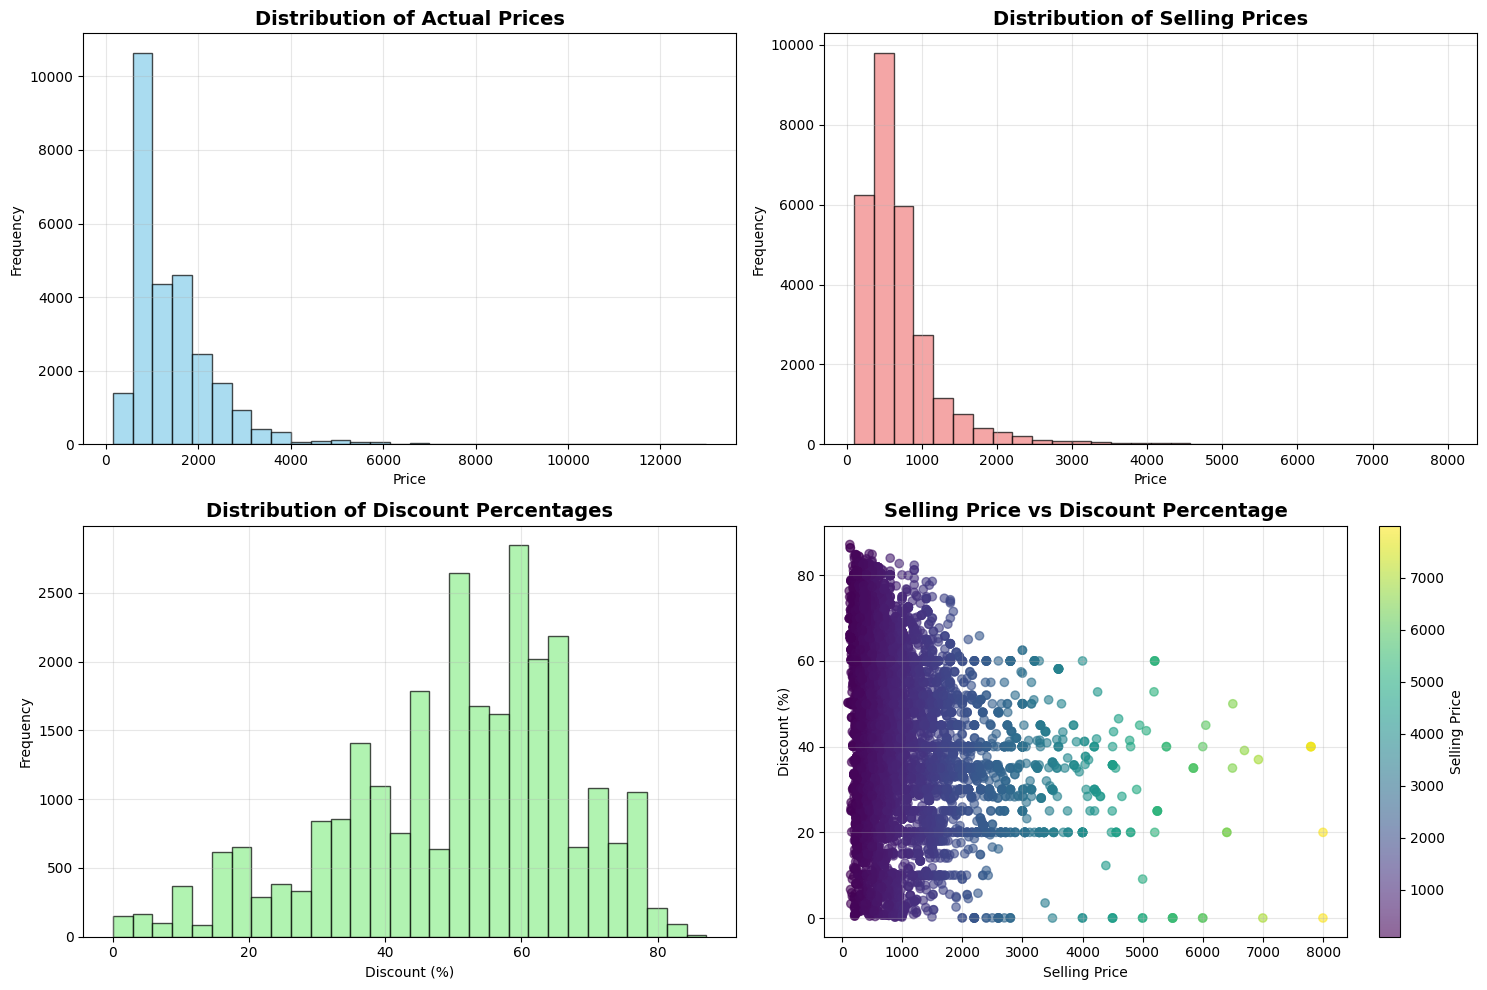

In [6]:
# Price distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Actual price distribution
axes[0,0].hist(df['actual_price'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of Actual Prices', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Price')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# Selling price distribution
axes[0,1].hist(df['selling_price'].dropna(), bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].set_title('Distribution of Selling Prices', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Price')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(True, alpha=0.3)

# Discount distribution
axes[1,0].hist(df['discount_percentage'].dropna(), bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].set_title('Distribution of Discount Percentages', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Discount (%)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].grid(True, alpha=0.3)

# Price vs Discount scatter
valid_data = df.dropna(subset=['selling_price', 'discount_percentage'])
scatter = axes[1,1].scatter(valid_data['selling_price'], valid_data['discount_percentage'],
                           alpha=0.6, c=valid_data['selling_price'], cmap='viridis')
axes[1,1].set_title('Selling Price vs Discount Percentage', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Selling Price')
axes[1,1].set_ylabel('Discount (%)')
axes[1,1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1,1], label='Selling Price')

plt.tight_layout()
plt.show()

## 4. Rating Analysis

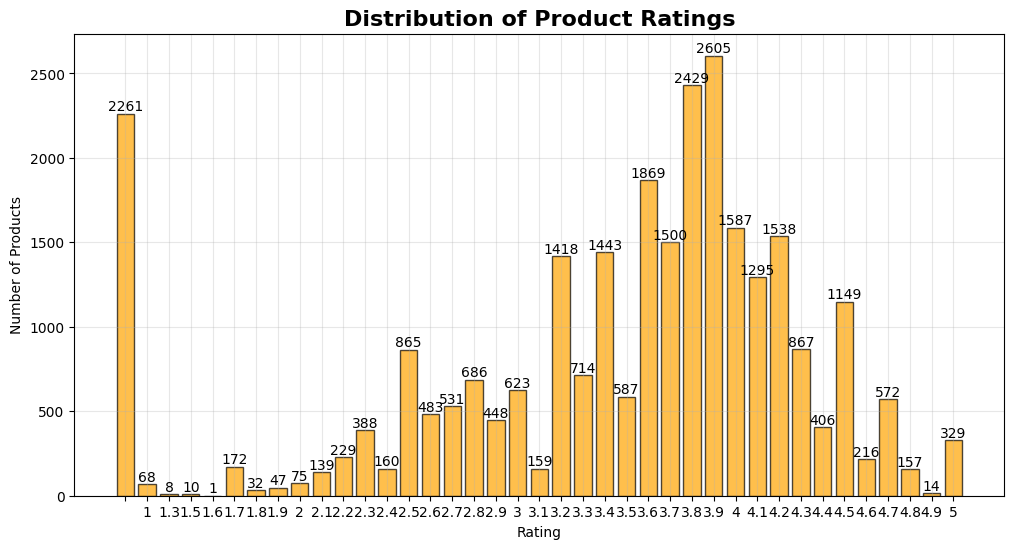

In [7]:
# Rating distribution plot
plt.figure(figsize=(12, 6))
rating_counts = df['average_rating'].value_counts().sort_index()
bars = plt.bar(rating_counts.index, rating_counts.values, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribution of Product Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Number of Products')
plt.xticks(rating_counts.index)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.show()

## 5. Brand and Seller Analysis

In [8]:
# Check for empty brands and sellers
print(f"Empty brands: {df['brand'].isna().sum()}")
print(f"Empty sellers: {df['seller'].isna().sum()}")

# Replace empty strings with 'Unknown'
df['brand'] = df['brand'].replace('', 'Unknown')
df['seller'] = df['seller'].replace('', 'Unknown')

# Top brands
top_brands = df['brand'].value_counts().head(10)
print("\nTop 10 Brands:")
print(top_brands)

# Top sellers
top_sellers = df['seller'].value_counts().head(10)
print("\nTop 10 Sellers:")
print(top_sellers)

Empty brands: 0
Empty sellers: 0

Top 10 Brands:
brand
Unknown         2009
ECKO Unl         951
Free Authori     860
ARBO             806
REEB             802
Pu               798
True Bl          793
Keo              660
Amp              585
Black Beat       548
Name: count, dtype: int64

Top 10 Sellers:
seller
Unknown                  1643
RetailNet                1411
SandSMarketing            887
BioworldMerchandising     842
ARBOR                     783
Keoti                     660
AFFGARMENTS               587
Black Beatle              548
AMALGUS ENTERPRISE        477
Tayab Manch Fashions      436
Name: count, dtype: int64


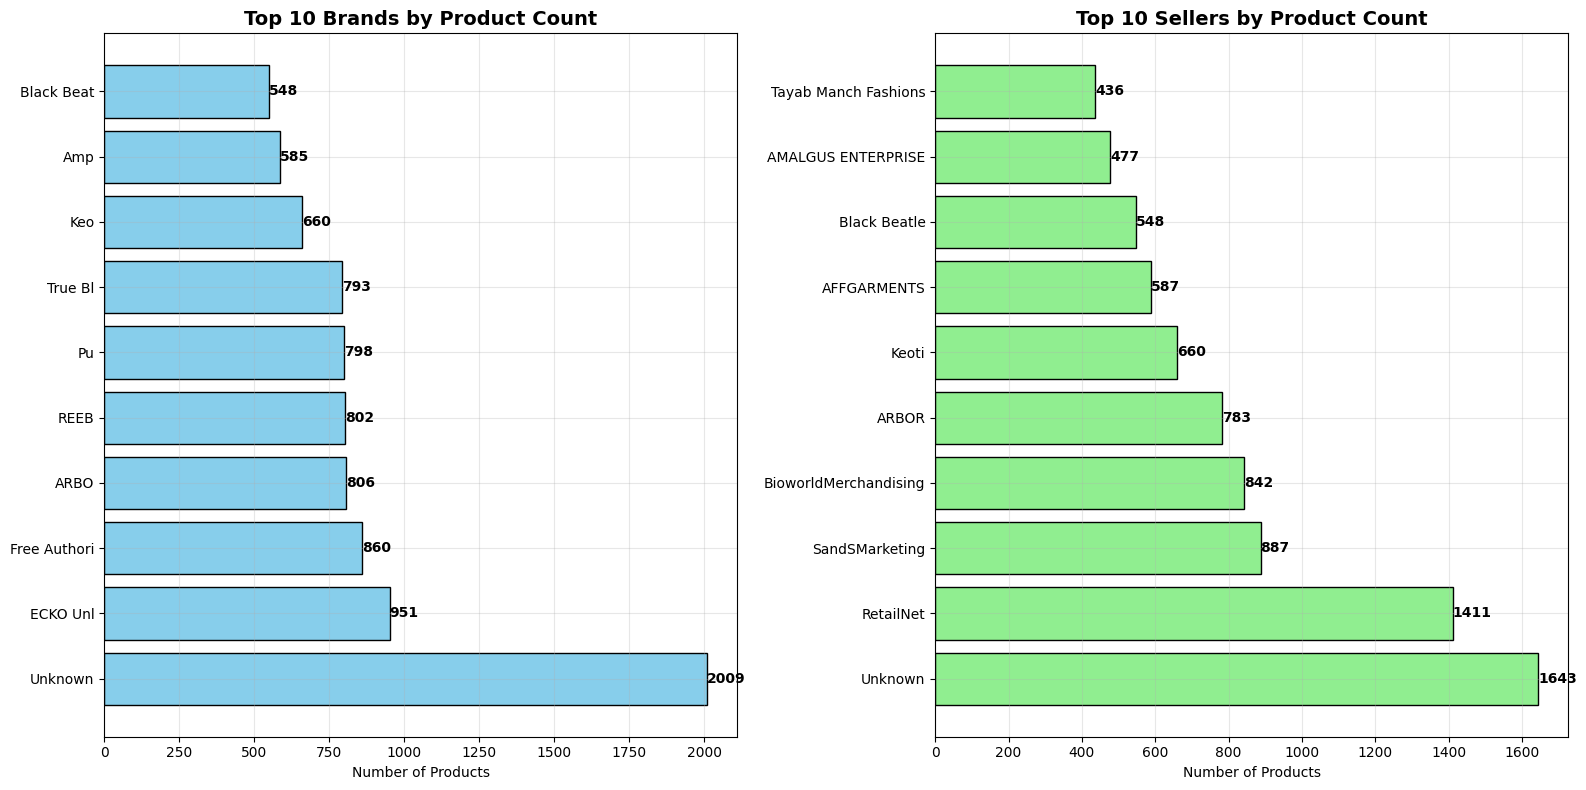

In [9]:
# Brand and seller plots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Top brands
bars1 = axes[0].barh(range(len(top_brands)), top_brands.values, color='skyblue', edgecolor='black')
axes[0].set_yticks(range(len(top_brands)))
axes[0].set_yticklabels(top_brands.index)
axes[0].set_title('Top 10 Brands by Product Count', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Products')
axes[0].grid(True, alpha=0.3)

# Add value labels
for i, bar in enumerate(bars1):
    width = bar.get_width()
    axes[0].text(width, bar.get_y() + bar.get_height()/2., f'{int(width)}',
                ha='left', va='center', fontweight='bold')

# Top sellers
bars2 = axes[1].barh(range(len(top_sellers)), top_sellers.values, color='lightgreen', edgecolor='black')
axes[1].set_yticks(range(len(top_sellers)))
axes[1].set_yticklabels(top_sellers.index)
axes[1].set_title('Top 10 Sellers by Product Count', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Products')
axes[1].grid(True, alpha=0.3)

# Add value labels
for i, bar in enumerate(bars2):
    width = bar.get_width()
    axes[1].text(width, bar.get_y() + bar.get_height()/2., f'{int(width)}',
                ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Category Analysis

In [10]:
# Category distribution
category_dist = df['category'].value_counts()
subcategory_dist = df['sub_category'].value_counts()

print("Category Distribution:")
print(category_dist)
print("\nSub-category Distribution:")
print(subcategory_dist.head(15))  # Show top 15 sub-categories

Category Distribution:
category
Clothing and Accessories    27118
Footwear                      920
Bags, Wallets & Belts          41
Toys                            1
Name: count, dtype: int64

Sub-category Distribution:
sub_category
Topwear                                15310
Bottomwear                              3666
Winter Wear                             2493
Innerwear and Swimwear                  1762
Clothing Accessories                    1742
Kurtas, Ethnic Sets and Bottoms         1180
Men's Footwear                           920
Fabrics                                  534
Sleepwear                                122
Blazers, Waistcoats and Suits            103
Tracksuits                                90
Raincoats                                 34
Uber Urban Clothing and Accessories       28
Inspire Clothing and Accessories          23
Sunshopping Bags, Wallets & Belts         21
Name: count, dtype: int64


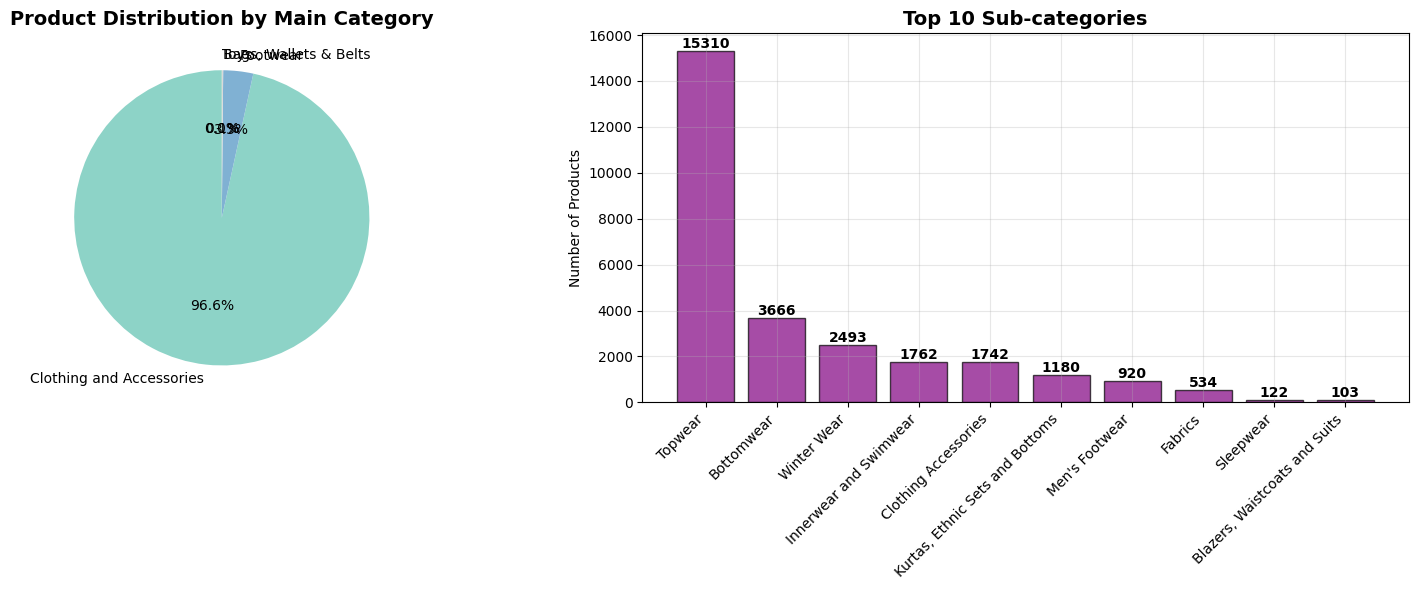

In [11]:
# Category plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Main categories - Pie chart
colors = plt.cm.Set3(np.linspace(0, 1, len(category_dist)))
wedges, texts, autotexts = axes[0].pie(category_dist.values, labels=category_dist.index, autopct='%1.1f%%',
                                       colors=colors, startangle=90)
axes[0].set_title('Product Distribution by Main Category', fontsize=14, fontweight='bold')

# Top sub-categories - Bar chart
top_subcategories = subcategory_dist.head(10)
bars = axes[1].bar(range(len(top_subcategories)), top_subcategories.values, color='purple', alpha=0.7, edgecolor='black')
axes[1].set_xticks(range(len(top_subcategories)))
axes[1].set_xticklabels(top_subcategories.index, rotation=45, ha='right')
axes[1].set_title('Top 10 Sub-categories', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Products')
axes[1].grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Stock Status Analysis

In [12]:
stock_status = df['out_of_stock'].value_counts()
print("Stock Status:")
print(stock_status)

print(f"\nPercentage of products in stock: {(1 - df['out_of_stock'].mean()) * 100:.1f}%")

Stock Status:
out_of_stock
False    26436
True      1644
Name: count, dtype: int64

Percentage of products in stock: 94.1%


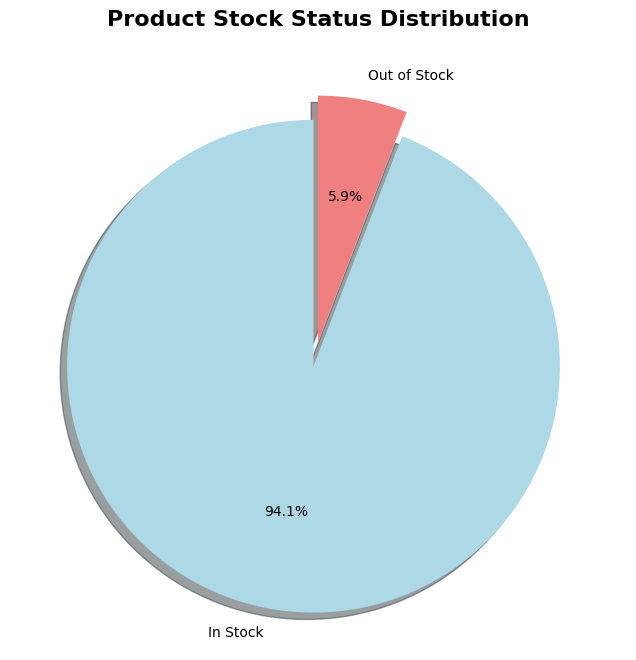

In [13]:
# Stock status plot
plt.figure(figsize=(8, 8))
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(stock_status.values, labels=['In Stock', 'Out of Stock'], autopct='%1.1f%%',
        colors=colors, explode=explode, shadow=True, startangle=90)
plt.title('Product Stock Status Distribution', fontsize=16, fontweight='bold')
plt.show()

## 8. Text Analysis - Product Descriptions

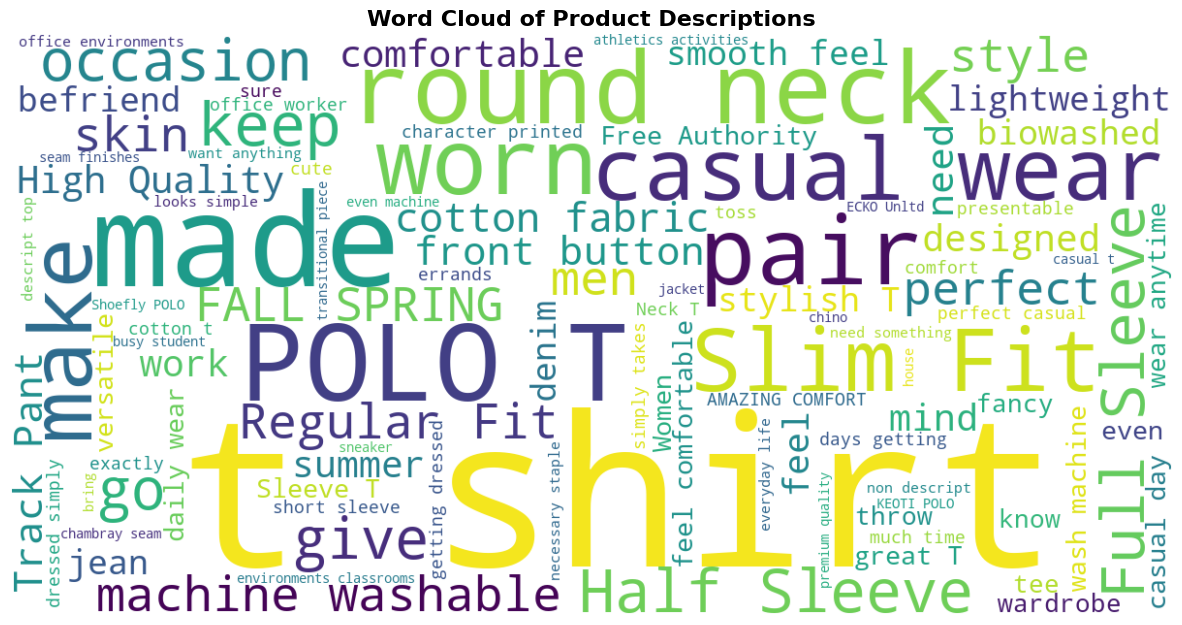

In [16]:
# Word cloud
plt.figure(figsize=(15, 8))

# Handle empty descriptions and combine all descriptions
df['description'] = df['description'].fillna('')
all_descriptions = ' '.join([str(desc) for desc in df['description']])

wordcloud = WordCloud(width=1200, height=600, background_color='white',
                      colormap='viridis', max_words=100).generate(all_descriptions)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Descriptions', fontsize=16, fontweight='bold')
plt.show()

In [17]:
# Description length analysis
df['description_length'] = df['description'].apply(lambda x: len(str(x).split()))
print(f"Average description length: {df['description_length'].mean():.1f} words")
print(f"Maximum description length: {df['description_length'].max()} words")
print(f"Minimum description length: {df['description_length'].min()} words")

Average description length: 29.8 words
Maximum description length: 623 words
Minimum description length: 0 words


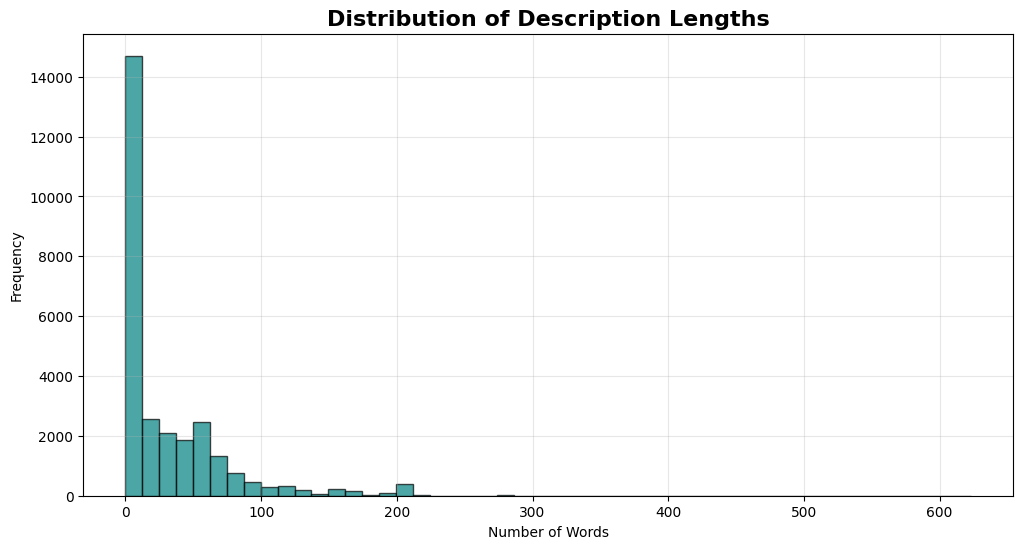

In [18]:
plt.figure(figsize=(12, 6))
plt.hist(df['description_length'], bins=50, alpha=0.7, color='teal', edgecolor='black')
plt.title('Distribution of Description Lengths', fontsize=16, fontweight='bold')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

## 9. Product Details Analysis

In [19]:
# Extract colors, patterns, and fabrics
colors = []
patterns = []
fabrics = []

for details in df['product_details']:
    if isinstance(details, list):
        for item in details:
            if isinstance(item, dict):
                for key, value in item.items():
                    if key and value:  # Check for non-empty values
                        if 'color' in key.lower():
                            colors.extend([c.strip() for c in str(value).split(',')])
                        elif 'pattern' in key.lower():
                            patterns.append(str(value))
                        elif 'fabric' in key.lower():
                            fabrics.append(str(value))

# Clean and count
colors = [color for color in colors if color and color not in ['', 'Color', 'color']]
patterns = [pattern for pattern in patterns if pattern and pattern not in ['', 'Pattern', 'pattern']]
fabrics = [fabric for fabric in fabrics if fabric and fabric not in ['', 'Fabric', 'fabric']]

top_colors = Counter(colors).most_common(10)
top_patterns = Counter(patterns).most_common(10)
top_fabrics = Counter(fabrics).most_common(10)

print("Top 10 Colors:")
for color, count in top_colors:
    print(f"{color}: {count}")

print("\nTop 10 Patterns:")
for pattern, count in top_patterns:
    print(f"{pattern}: {count}")

print("\nTop 10 Fabrics:")
for fabric, count in top_fabrics:
    print(f"{fabric}: {count}")

Top 10 Colors:
Black: 4698
Multicolor: 4147
Blue: 3534
White: 2775
Grey: 2395
Red: 1383
Dark Blue: 1333
Green: 997
Yellow: 937
Maroon: 671

Top 10 Patterns:
Solid: 11114
Printed: 6904
Self Design: 1290
Striped: 1158
Checkered: 1102
Color Block: 1026
Graphic Print: 1025
Typography: 513
Washed: 151
Geometric Print: 96

Top 10 Fabrics:
Cotton Blend: 10667
Gentle Machine Wash: 5023
Pure Cotton: 4961
Regular Machine Wash: 4388
Polycotton: 2667
Machine wash as per tag: 2503
Hand wash: 1446
Polyester: 1255
Cotton: 1013
Do not bleach: 782


## 11. Summary Statistics

In [25]:
print("="*60)
print("SUMMARY STATISTICS")
print("="*60)

print(f"Total number of products: {len(df):,}")
print(f"Number of unique brands: {df['brand'].nunique()}")
print(f"Number of unique sellers: {df['seller'].nunique()}")
print(f"Number of categories: {df['category'].nunique()}")
print(f"Number of sub-categories: {df['sub_category'].nunique()}")
print(f"Percentage of products in stock: {(1 - df['out_of_stock'].mean()) * 100:.1f}%")
print(f"Average product rating: {df['average_rating_clean'].mean():.2f}")
print(f"Price range: ₹{df['selling_price_clean'].min():.2f} - ₹{df['selling_price_clean'].max():.2f}")
print(f"Most common color: {top_colors[0][0] if top_colors else 'N/A'}")
print(f"Most common pattern: {top_patterns[0][0] if top_patterns else 'N/A'}")
print(f"Most common fabric: {top_fabrics[0][0] if top_fabrics else 'N/A'}")
print(f"Average description length: {df['description_length'].mean():.1f} words")

SUMMARY STATISTICS
Total number of products: 28,080
Number of unique brands: 325
Number of unique sellers: 535
Number of categories: 4
Number of sub-categories: 24
Percentage of products in stock: 94.1%


KeyError: 'average_rating_clean'